In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('Full-Sales-Superstore_1.csv')

In [3]:
df.shape

(9994, 21)

In [4]:
df.head()

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,2011-01-04,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,...,2011-01-08,Standard Class,Texas,Paper,20%,1,$6,34%,2,$16
1,Office Supplies,Naperville,United States,Phillina Ober,GBC,2011-01-05,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,...,2011-01-09,Standard Class,Illinois,Binders,80%,1,($5),-155%,2,$4
2,Office Supplies,Naperville,United States,Phillina Ober,Avery,2011-01-05,CA-2011-112326,60540,Avery 508,Central,...,2011-01-09,Standard Class,Illinois,Labels,20%,1,$4,36%,3,$12
3,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,2011-01-05,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,...,2011-01-09,Standard Class,Illinois,Storage,20%,1,($65),-24%,3,$273
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,2011-01-06,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,...,2011-01-13,Standard Class,Pennsylvania,Art,20%,1,$5,25%,3,$20


In [5]:
# clean the numeric data
# Discount(remove %)
df['Discount'] = df['Discount'].apply(lambda x:x.split('%')[0])

In [6]:
# Profit(remove$ and ())
df['Profit'] = df['Profit'].apply(lambda x: x.replace('(','-'))
df['Profit'] = df['Profit'].apply(lambda x: x.replace(')',''))
df['Profit'] = df['Profit'].apply(lambda x: x.replace(',',''))
df['Profit'] = df['Profit'].apply(lambda x: x.replace('$',''))

In [7]:
# Prodit Ratio (Remove %)
df['Profit Ratio'] = df['Profit Ratio'].apply(lambda x: x.split('%')[0])

In [8]:
# sales(remove $)
df['Sales'] = df['Sales'].apply(lambda x: x.split('$')[1])
df['Sales'] = df['Sales'].apply(lambda x: x.replace(',',''))

In [9]:
df[['Discount']] = df[['Discount']].astype(float)

In [10]:
df.columns

Index(['Category', 'City', 'Country', 'Customer Name', 'Manufacturer',
       'Order Date', 'Order ID', 'Postal Code', 'Product Name', 'Region',
       'Segment', 'Ship Date', 'Ship Mode', 'State', 'Sub-Category',
       'Discount', 'Number of Records', 'Profit', 'Profit Ratio', 'Quantity',
       'Sales'],
      dtype='object')

In [11]:
df[['Discount', 'Profit','Profit Ratio','Sales']] = df[['Discount', 'Profit','Profit Ratio','Sales']].astype(float)

In [12]:
df.dtypes

Category              object
City                  object
Country               object
Customer Name         object
Manufacturer          object
Order Date            object
Order ID              object
Postal Code            int64
Product Name          object
Region                object
Segment               object
Ship Date             object
Ship Mode             object
State                 object
Sub-Category          object
Discount             float64
Number of Records      int64
Profit               float64
Profit Ratio         float64
Quantity               int64
Sales                float64
dtype: object

In [13]:
df['Order_date'] = pd.to_datetime(df['Order Date'])

In [14]:
df['y_q'] = df['Order_date'].dt.to_period('Q').dt.strftime('%Yq%q')
df['y_q']

0       2011q1
1       2011q1
2       2011q1
3       2011q1
4       2011q1
         ...  
9989    2014q4
9990    2014q4
9991    2014q4
9992    2014q4
9993    2014q4
Name: y_q, Length: 9994, dtype: object

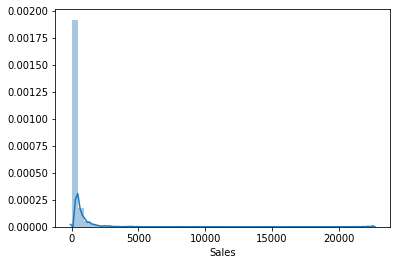

In [15]:
sns.distplot(df['Sales'])

[Text(0, 0.5, 'Sales*10^3)'), Text(0.5, 0, 'Segment')]

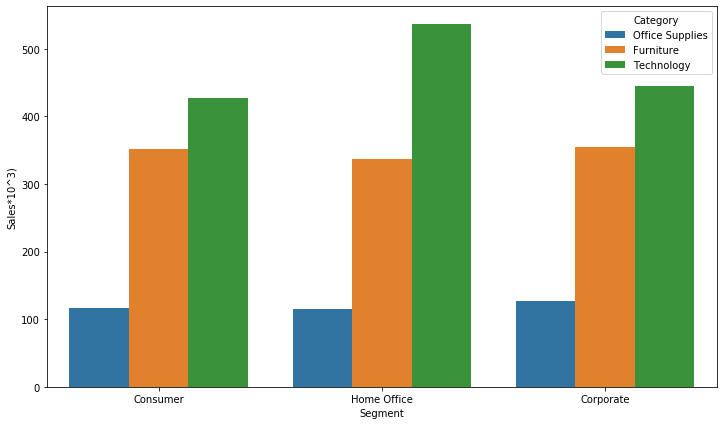

In [16]:
#Segment vs Sales
plt.figure(figsize=(12,7))
g = sns.barplot(x = 'Segment',y = 'Sales', data= df,hue = 'Category', ci=None)
g.set(xlabel = 'Segment',ylabel = 'Sales*10^3)')

[Text(0, 0.5, 'Profit*10^3')]

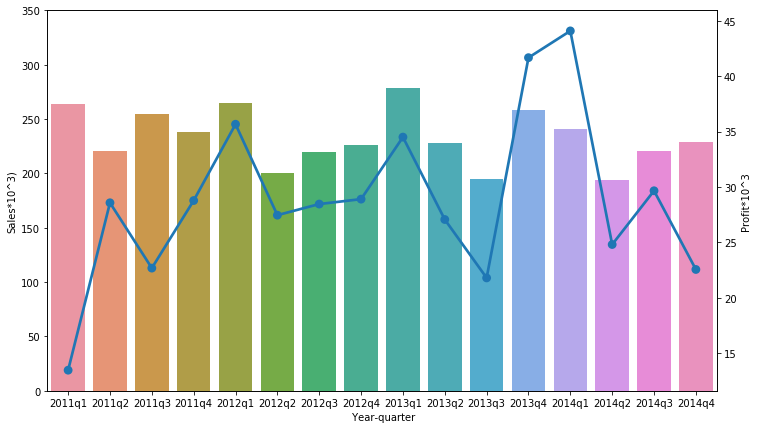

In [40]:
#Order date vs Sales ; Profit ratio vs Sales 
# df['mean_sales'] = df['Sales'].sum()
fig, ax1 = plt.subplots(figsize = (12,7))
g1 = sns.barplot(x = 'y_q',y = 'Sales', data= df,ci = None, ax = ax1)
g1.set(ylim = (0,350))
ax1.set(xlabel = ' Year-quarter',ylabel = 'Sales*10^3)')
ax2 = ax1.twinx()
g2 = sns.pointplot(x = 'y_q', y = 'Profit', data = df, ci = None,ax = ax2,style='label')
ax2.set(ylabel = 'Profit*10^3')

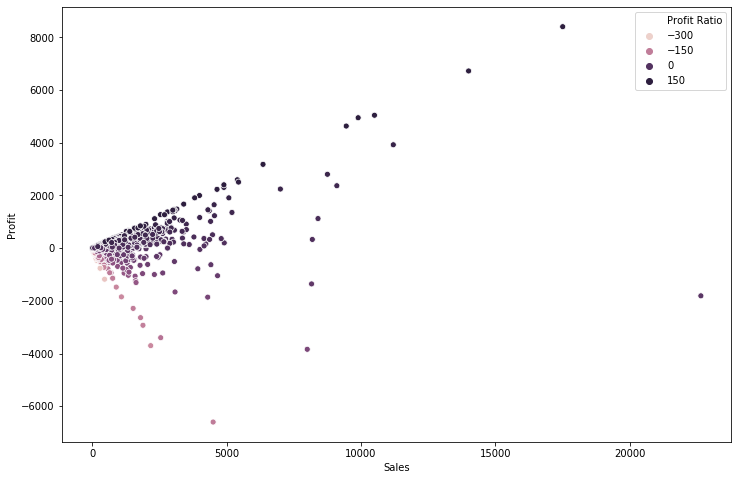

In [18]:
#Sales and profit 
plt.figure(figsize=(12,8))
g = sns.scatterplot(x = 'Sales',y = 'Profit',data = df,hue = 'Profit Ratio')

In [19]:
df['Profit'].describe()

count    9994.000000
mean       28.651891
std       234.255712
min     -6600.000000
25%         2.000000
50%         9.000000
75%        29.000000
max      8400.000000
Name: Profit, dtype: float64

In [20]:
#Customer vs Sales (top10 and last10)
customer_top10 = df[['Customer Name', 'Sales','Profit','Profit Ratio','Discount']].sort_values('Sales', ascending = False).head(15)
customer_last10 = df[['Customer Name', 'Sales','Profit','Profit Ratio','Discount']].sort_values('Sales', ascending = True).head(10)
print(customer_top10)

             Customer Name    Sales  Profit  Profit Ratio  Discount
216            Sean Miller  22638.0 -1811.0          -8.0      50.0
5778          Tamara Chand  17500.0  8400.0          48.0       0.0
7106          Raymond Buch  14000.0  6720.0          48.0       0.0
8989          Tom Ashbrook  11200.0  3920.0          35.0      20.0
9335          Hunter Lopez  10500.0  5040.0          48.0       0.0
6542         Adrian Barton   9893.0  4946.0          50.0       0.0
1180          Sanjit Chand   9450.0  4630.0          49.0       0.0
4526          Bill Shonely   9100.0  2366.0          26.0       0.0
4188          Sanjit Engle   8750.0  2800.0          32.0       0.0
4745    Christopher Conant   8400.0  1120.0          13.0      40.0
792           Ken Lonsdale   8188.0   328.0           4.0       0.0
1023          Becky Martin   8160.0 -1360.0         -17.0      40.0
9130        Grant Thornton   8000.0 -3840.0         -48.0      50.0
1824      Tom Boeckenhauer   7000.0  2240.0     

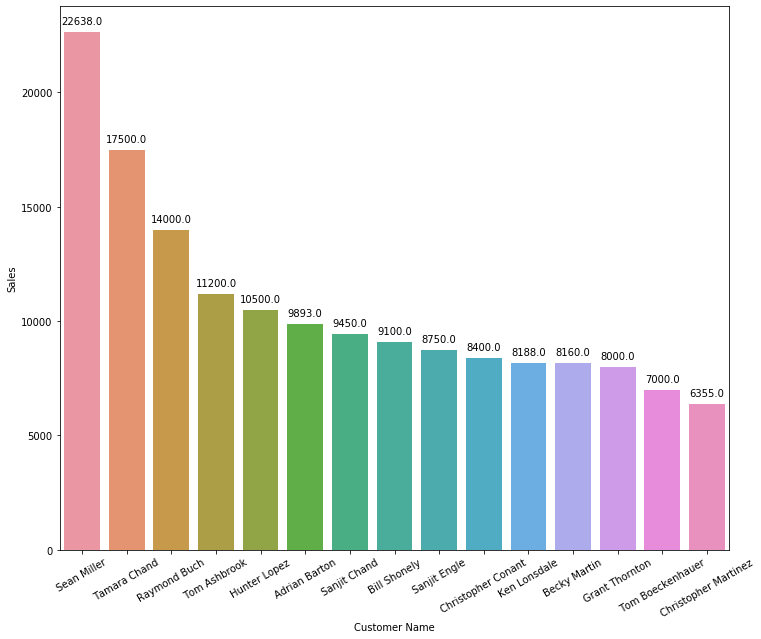

In [21]:
# top 10 customers sales 
fig, ax = plt.subplots(figsize = (12,10))
customer_sales = customer_top10['Sales']
g = sns.barplot(x = 'Customer Name', y = 'Sales', data = customer_top10)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
for p in g.patches:
    g.annotate(format(p.get_height(),), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center',
                   xytext = (0,8),
                   textcoords = 'offset points')

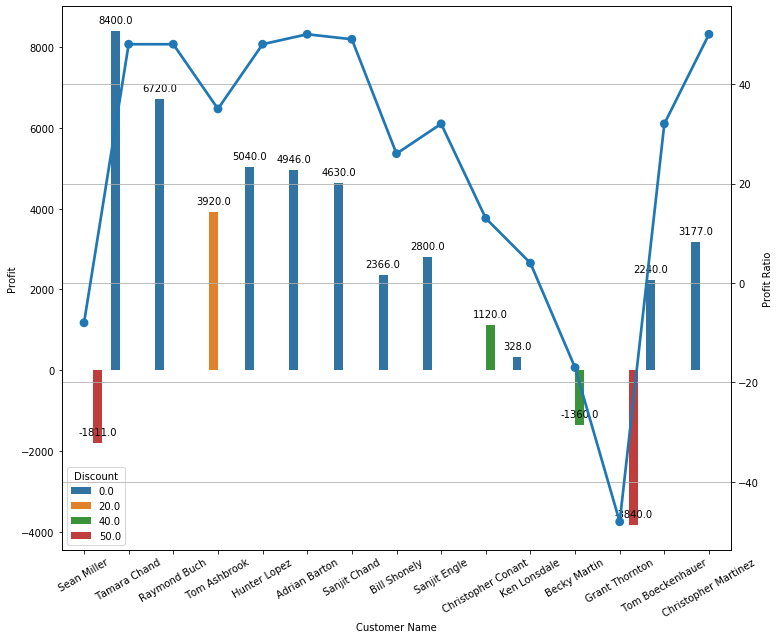

In [22]:
# top 10 customers, profit & profit ratio, discount
fig, ax1 = plt.subplots(figsize = (12,10))
customer_sales = customer_top10['Sales']
g = sns.barplot(x = 'Customer Name', y = 'Profit', data = customer_top10,ax = ax1,hue = 'Discount')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
for p in g.patches:
    g.annotate(format(p.get_height(),), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center',
                   xytext = (0,8),
                   textcoords = 'offset points')
    
ax2 = ax1.twinx()
g2 = sns.pointplot(x = 'Customer Name', y ='Profit Ratio',data = customer_top10,ax = ax2,style='label')
plt.grid()

In [61]:
# relationship between profit and discount (from 2014 q1 to 2014 q4)
col = df[['Sales','Profit','Profit Ratio','Discount','y_q']]
corr_2014_y = col[col['y_q'] >= '2014q1']
corr_2014= corr_2014_y[['Sales','Profit','Profit Ratio','Discount']].corr()
corr_2014

,Sales,Profit,Profit Ratio,Discount
Sales,1.000000,0.532301,0.008828,-0.033504
Profit,0.532301,1.000000,0.222577,-0.218335
Profit Ratio,0.008828,0.222577,1.000000,-0.864122
Discount,-0.033504,-0.218335,-0.864122,1.000000


In [63]:
# relationship between profit and discount (from 2013 q1 to 2013 q4)
col_2013 = df[['Sales','Profit','Profit Ratio','Discount','y_q']]
corr_2013_y = col_2013[(col['y_q'] >= '2013q1') & (col['y_q'] < '2014q1')]
corr_2013 = corr_2013_y[['Sales','Profit','Profit Ratio','Discount']].corr()
corr_2013

,Sales,Profit,Profit Ratio,Discount
Sales,1.000000,0.637563,0.003689,-0.038001
Profit,0.637563,1.000000,0.193208,-0.183172
Profit Ratio,0.003689,0.193208,1.000000,-0.859389
Discount,-0.038001,-0.183172,-0.859389,1.000000


In [64]:
# relationship between profit and discount (from 2012 q1 to 2012 q4)
col_2012 = df[['Sales','Profit','Profit Ratio','Discount','y_q']]
corr_2012_y = col_2012[(col['y_q'] >= '2012q1') & (col['y_q'] < '2013q1')]
corr_2012 = corr_2012_y[['Sales','Profit','Profit Ratio','Discount']].corr()
corr_2012

,Sales,Profit,Profit Ratio,Discount
Sales,1.000000,0.472325,0.013571,-0.050410
Profit,0.472325,1.000000,0.280089,-0.272446
Profit Ratio,0.013571,0.280089,1.000000,-0.870228
Discount,-0.050410,-0.272446,-0.870228,1.000000


In [67]:
# relationship between profit and discount (from 2011 q1 to 2011 q4)
col_2011 = df[['Sales','Profit','Profit Ratio','Discount','y_q']]
corr_2011_y = col_2011[(col['y_q'] >= '2011q1') & (col['y_q'] < '2012q1')]
corr_2011 = corr_2011_y[['Sales','Profit','Profit Ratio','Discount']].corr()
corr_2011

,Sales,Profit,Profit Ratio,Discount
Sales,1.000000,0.181770,-0.010867,0.002931
Profit,0.181770,1.000000,0.243871,-0.252039
Profit Ratio,-0.010867,0.243871,1.000000,-0.865005
Discount,0.002931,-0.252039,-0.865005,1.000000


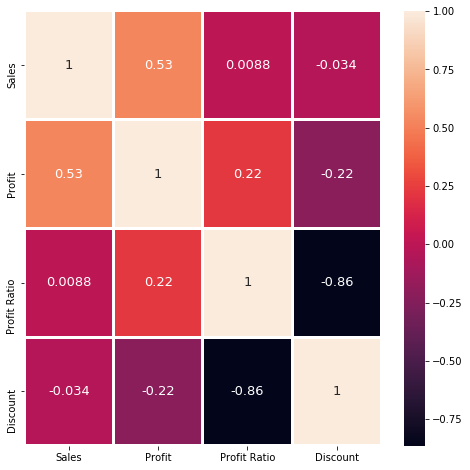

In [44]:
# Discount vs Profit(2014)
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr_2014,vmax = 1,annot_kws={"size": 13},annot=True,linewidths=2, xticklabels=1)

Text(0, 0.5, 'Discount')

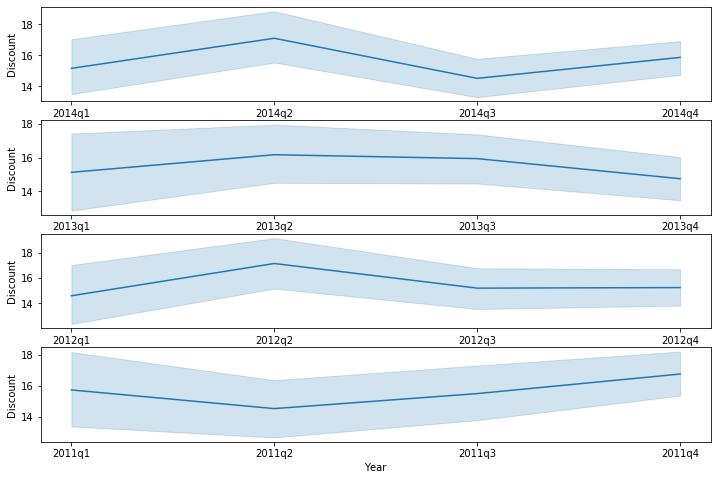

In [71]:
# discount comparsion (2011 to 2014)
fig, axes = plt.subplots(4,1,figsize=(12,8))
sns.lineplot(x = 'y_q', y = 'Discount', data = corr_2014_y,ax = axes[0])
sns.lineplot(x = 'y_q', y = 'Discount', data = corr_2013_y,ax = axes[1])
sns.lineplot(x = 'y_q', y = 'Discount', data = corr_2012_y,ax = axes[2])
sns.lineplot(x = 'y_q', y = 'Discount', data = corr_2011_y,ax = axes[3])
plt.xlabel('Year')
plt.ylabel('Discount')